In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from functools import reduce
import numpy as np

%matplotlib inline

# Step 1

Which dataset did you select<br>
### default_of_credit_card_clients.csv
Which regulated domain does your dataset belong to?
### Civil Rights act, US Bill of Rights
How many observations are in the dataset?
### 30000
How many variables in the dataset?
### 25
Dependent variables:
### 3 total protected classes:
### age
Age Discrimination in Employment Act (ADEA)
### gender
Title VII of the Civil Rights Act of 1964
### education
Title VII of the Civil Rights Act of 1964 

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv', encoding= 'unicode_escape')

#pd.set_option('max_columns', 51)
df = df.fillna(0)
df = df.drop_duplicates()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Step 2

### Encoding key
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

### 2.1 - 2.3
#### Protected classes: female, education = highschool

In [3]:
#counts of protected categories
female = df.loc [ df [ 'SEX' ] == 2 ].count()
male = df.loc [ df [ 'SEX' ] == 1 ].count()
#femCounts = pd.Series(female).value_counts()
education = df.loc [ df [ 'EDUCATION' ] == 3 ].count()
print(female.head(), education.head(), male.head())

ID           18112
LIMIT_BAL    18112
SEX          18112
EDUCATION    18112
MARRIAGE     18112
dtype: int64 ID           4917
LIMIT_BAL    4917
SEX          4917
EDUCATION    4917
MARRIAGE     4917
dtype: int64 ID           11888
LIMIT_BAL    11888
SEX          11888
EDUCATION    11888
MARRIAGE     11888
dtype: int64


In [4]:
female = df.loc [ df [ 'SEX' ] == 2 ]
femDefault = df.loc [ df [ 'default payment next month'] == 1 ]

In [5]:
sexCounts = df.groupby('SEX')['default payment next month'].value_counts()
sexCounts

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default payment next month, dtype: int64

### 2.1

In [6]:
data = [14349,11888]
df = pd.DataFrame(data, index =['female', 'male']) 
df

,0
female,14349
male,11888


### 2.2 - 2.3

In [7]:
data = [18112,9015],[3763, 2873]
df = pd.DataFrame(data, index =['did not default', 'defaulted'], 
                                              columns =['Privileged (female)', 'Unprivileged (male)']) 
df

,Privileged (female),Unprivileged (male)
did not default,18112,9015
defaulted,3763,2873


### 2.4
#### histogram for each protected class variable that graphs the frequency values of its membership categories as a function of the dependent variables

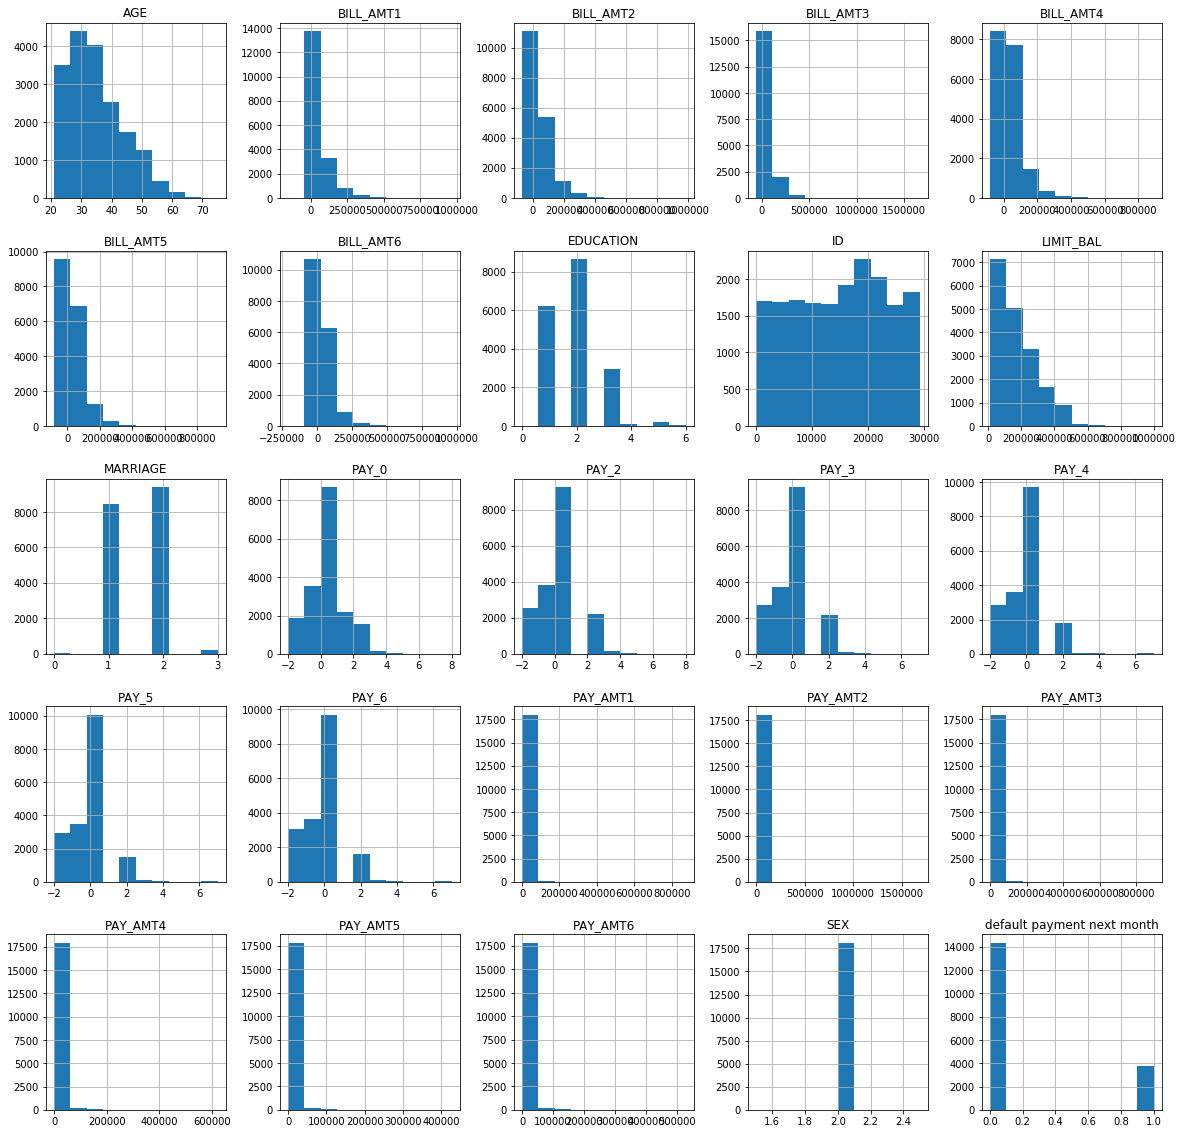

In [8]:
female.hist(figsize = (20, 20))
plt.show()

# Step 3

### 3.1
#### Fairness metric 1: "default payment next month" = false/0<br>
#### Fairness metric 2: "education" = highschool

In [9]:
data = [18112,9015],[3763, 2873]
df = pd.DataFrame(data, index =['education', 'defaulted'], 
                                              columns =['Privileged (female)', 'Unprivileged (male)']) 
df

,Privileged (female),Unprivileged (male)
education,18112,9015
defaulted,3763,2873


### Step 4

### See DIA_Taschdjian_assign8.ipynb

### Step 5

### I am a team of one

In [10]:
jupyter nbconvert --to html taschdjianAssign8.ipynb  

SyntaxError: invalid syntax (<ipython-input-10-9596a3b3199d>, line 1)